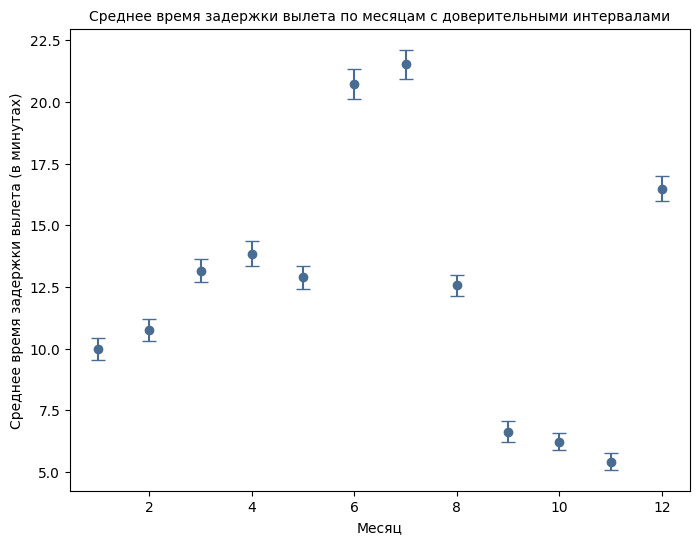

T-statistic: -2.39, P-value: 0.0170
На уровне значимости 0.05 среднее время задержки вылета в январе и феврале неодинаково.
На уровне значимости 0.01 среднее время задержки вылета в январе и феврале одинаково.


In [37]:
# Задача: нарисовать график среднего времени задержки вылета по месяцам и отметить на нем границы доверительных интервалов с уровнем доверия 0.95; проверить, можно ли принять гипотезу о равенстве средних в январе и феврале на уровне значимости 0.05 / на уровне значимости 0.01
# Для этого задания я также использовал библиотеку numpy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

flights = pd.read_csv('flights_NY.csv').dropna(axis=0)

# Рассчитал среднее время задержки вылета по месяцам
avg_delays = flights.groupby('month')['dep_delay'].mean()

# Вычислил стандартную ошибку среднего значения за каждый месяц
std_err = flights.groupby('month')['dep_delay'].std() / np.sqrt(flights.groupby('month')['dep_delay'].count())

# Рассчитал доверительные интервалы с уровнем доверия 0,95
ci = 1.96 * std_err

# Построил диаграмму (вариант с "бусинами" мне показался наиболее наглядным)
plt.figure(figsize=(8, 6))
plt.errorbar(avg_delays.index, avg_delays.values, yerr=ci, fmt='o', capsize=5, color='#486c92')
plt.xlabel('Месяц')
plt.ylabel('Среднее время задержки вылета (в минутах)')
plt.title('Среднее время задержки вылета по месяцам с доверительными интервалами', fontsize=10)
plt.show()

# Перешёл к проверку гипотез о равенстве средних в январе и феврале, использовав тест Стъюдента
jan_delays = flights[flights['month'] == 1]['dep_delay']
feb_delays = flights[flights['month'] == 2]['dep_delay']
t_stat, p_val = stats.ttest_ind(jan_delays, feb_delays)
print(f'T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}')

# Проверил гипотезу на уровне значимости 0.05
if p_val < 0.05:
    print('На уровне значимости 0.05 среднее время задержки вылета в январе и феврале неодинаково.')
else:
    print('На уровне значимости 0.05 среднее время задержки вылета в январе и феврале одинаково.')

# На уровне значимости 0.01
if p_val < 0.01:
    print('На уровне значимости 0.01 среднее время задержки вылета в январе и феврале неодинаково.')
else:
    print('На уровне значимости 0.01 среднее время задержки вылета в январе и феврале одинаково.')